In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
print(df.shape)
n = df.shape[0]
df.sample(5)

(818238, 35)


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
572234,672234,25.044,82.917,23.270,12.557,-999.000,-999.000,-999.000,0.832,25.124,...,-1.459,-2.437,-999.000,-999.000,-999.000,34.572,0.650505,b,v,1.182766
571377,671377,85.283,2.157,65.178,164.280,0.665,67.644,3.604,0.893,2.447,...,-1.595,3.078,34.393,-2.260,-2.543,167.943,0.093659,b,v,0.170294
621040,721040,131.419,31.833,86.027,207.581,2.379,366.583,1.370,1.283,34.221,...,-0.479,-2.635,109.660,-2.859,-2.983,278.210,0.000461,s,b,0.003789
502031,602031,182.697,119.127,123.376,1.004,-999.000,-999.000,-999.000,3.259,1.004,...,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,0.000814,s,v,0.001483
570083,670083,137.262,69.303,97.261,21.257,-999.000,-999.000,-999.000,3.623,21.257,...,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,1.846356,b,v,3.357098


In [4]:
df['Label'] = np.where(df['Label']=='s', 1, 0)
df = df.drop(columns=["KaggleSet", "EventId", 'Weight', 'KaggleWeight'])

In [5]:
df.sample(5)

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
338592,80.622,64.403,62.413,6.663,-999.000,-999.00,-999.000,2.521,6.663,65.681,...,131.581,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,0
676538,108.181,12.102,77.191,33.947,-999.000,-999.00,-999.000,2.841,33.947,79.135,...,240.018,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,1
458442,-999.000,84.093,42.941,6.193,-999.000,-999.00,-999.000,1.487,6.193,56.167,...,135.639,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,0
67382,92.402,55.973,68.599,47.638,2.479,161.53,3.428,2.250,27.975,154.191,...,222.203,2,51.019,-3.468,-0.278,36.361,-0.989,-2.775,87.379,0
98217,-999.000,78.559,111.484,3.631,-999.000,-999.00,-999.000,2.510,3.631,99.837,...,183.693,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,0


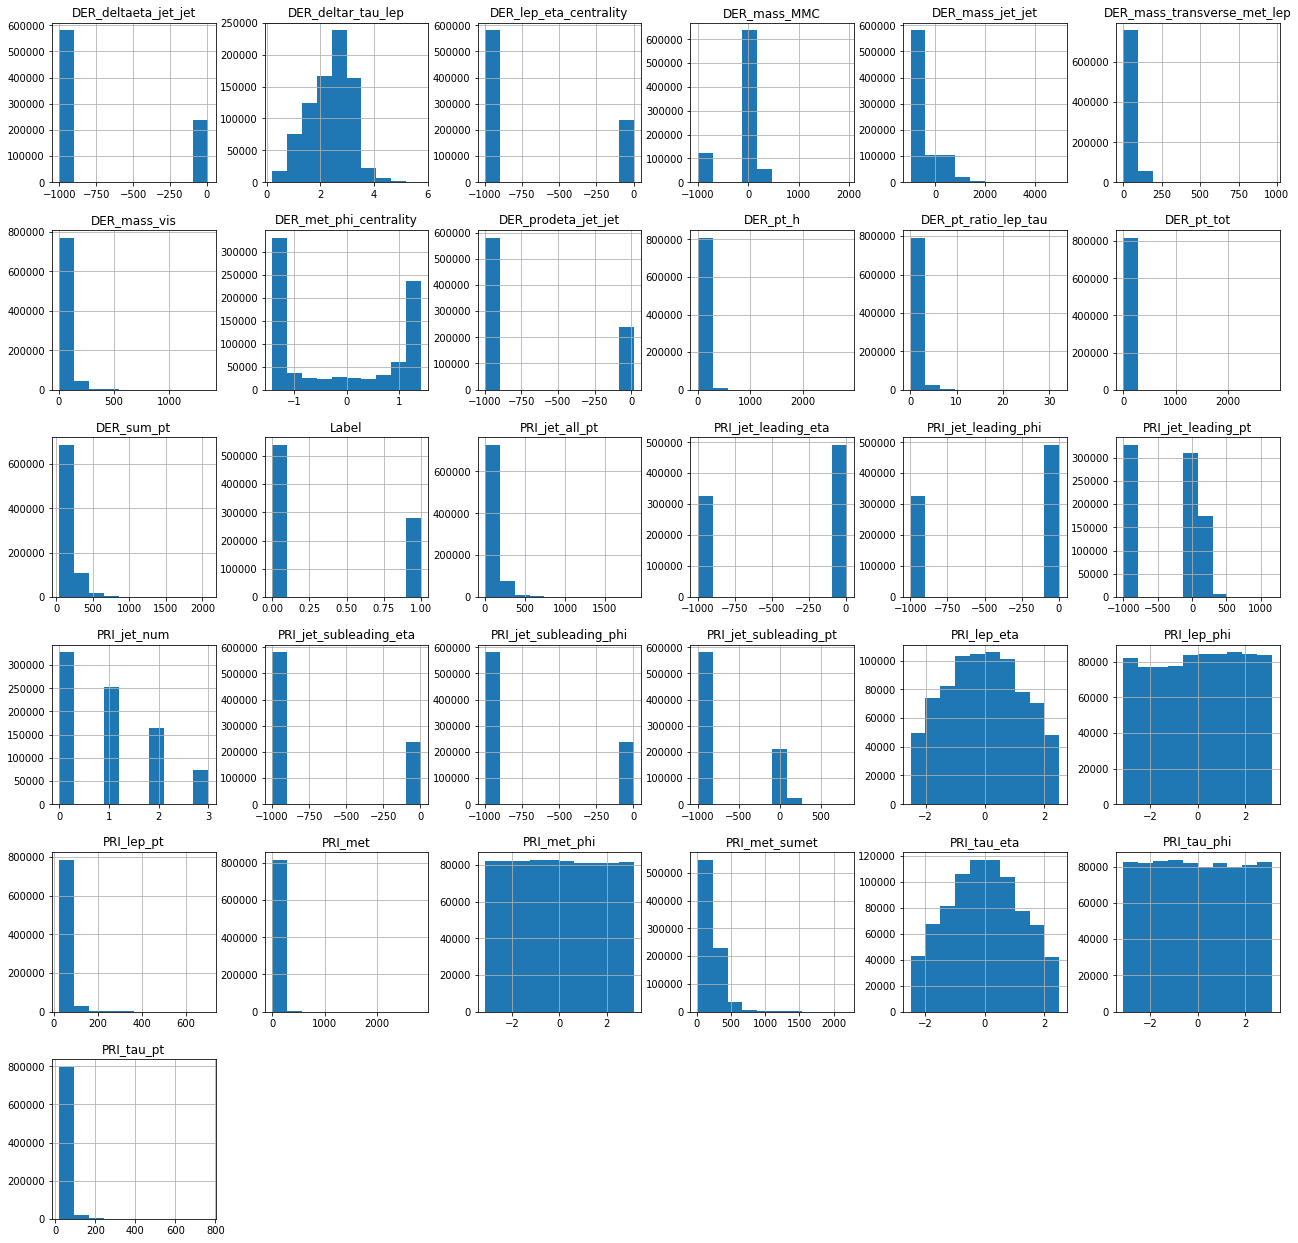

In [9]:
df.hist(figsize = (22,22))[1]
plt.savefig('histograms.png')

In [31]:
columns_to_remove = []
for column in df.columns:
    n_invalid = np.count_nonzero(df[column] == -999.0)
    rate_invalid = n_invalid / df.shape[0]
    print("{} - percentage of missing values : {} %".format(column, 100*rate_invalid))
    if rate_invalid >= 0.4:
        print("\tRemoving {}".format(column))
        columns_to_remove.append(column)

DER_mass_MMC - percentage of missing values : 15.228087671313236 %
DER_mass_transverse_met_lep - percentage of missing values : 0.0 %
DER_mass_vis - percentage of missing values : 0.0 %
DER_pt_h - percentage of missing values : 0.0 %
DER_deltaeta_jet_jet - percentage of missing values : 70.91494161845331 %
	Removing DER_deltaeta_jet_jet
DER_mass_jet_jet - percentage of missing values : 70.91494161845331 %
	Removing DER_mass_jet_jet
DER_prodeta_jet_jet - percentage of missing values : 70.91494161845331 %
	Removing DER_prodeta_jet_jet
DER_deltar_tau_lep - percentage of missing values : 0.0 %
DER_pt_tot - percentage of missing values : 0.0 %
DER_sum_pt - percentage of missing values : 0.0 %
DER_pt_ratio_lep_tau - percentage of missing values : 0.0 %
DER_met_phi_centrality - percentage of missing values : 0.0 %
DER_lep_eta_centrality - percentage of missing values : 70.91494161845331 %
	Removing DER_lep_eta_centrality
PRI_tau_pt - percentage of missing values : 0.0 %
PRI_tau_eta - percenta

In [32]:
new_df = df.drop(columns=columns_to_remove)

In [33]:
print(new_df.shape, len(columns_to_remove))

(818238, 21) 10


In [34]:
new_df.columns

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'PRI_tau_pt',
       'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num',
       'PRI_jet_all_pt', 'Label'],
      dtype='object')

In [35]:
seriesObj = new_df.apply(lambda x: -999.0 in list(x), axis=1)
numOfRows = len(seriesObj[seriesObj == False].index)
print("nombre et fréquence de lignes complètes (sans -999) : {} {}".format(numOfRows, numOfRows/n))

nombre et fréquence de lignes complètes (sans -999) : 693636 0.8477191232868676


In [36]:
new_df.columns

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'PRI_tau_pt',
       'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num',
       'PRI_jet_all_pt', 'Label'],
      dtype='object')

In [37]:
print(new_df.shape)
new_df = new_df[seriesObj == False]
print(new_df.shape)

(818238, 21)
(693636, 21)


In [39]:
np.count_nonzero(new_df["Label"] == 1) / len(new_df)

0.3897880156162598

In [40]:
np.count_nonzero(new_df["Label"] == 0) / len(new_df)

0.6102119843837401

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f8225f8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a1f8875f8>], dtype=object)

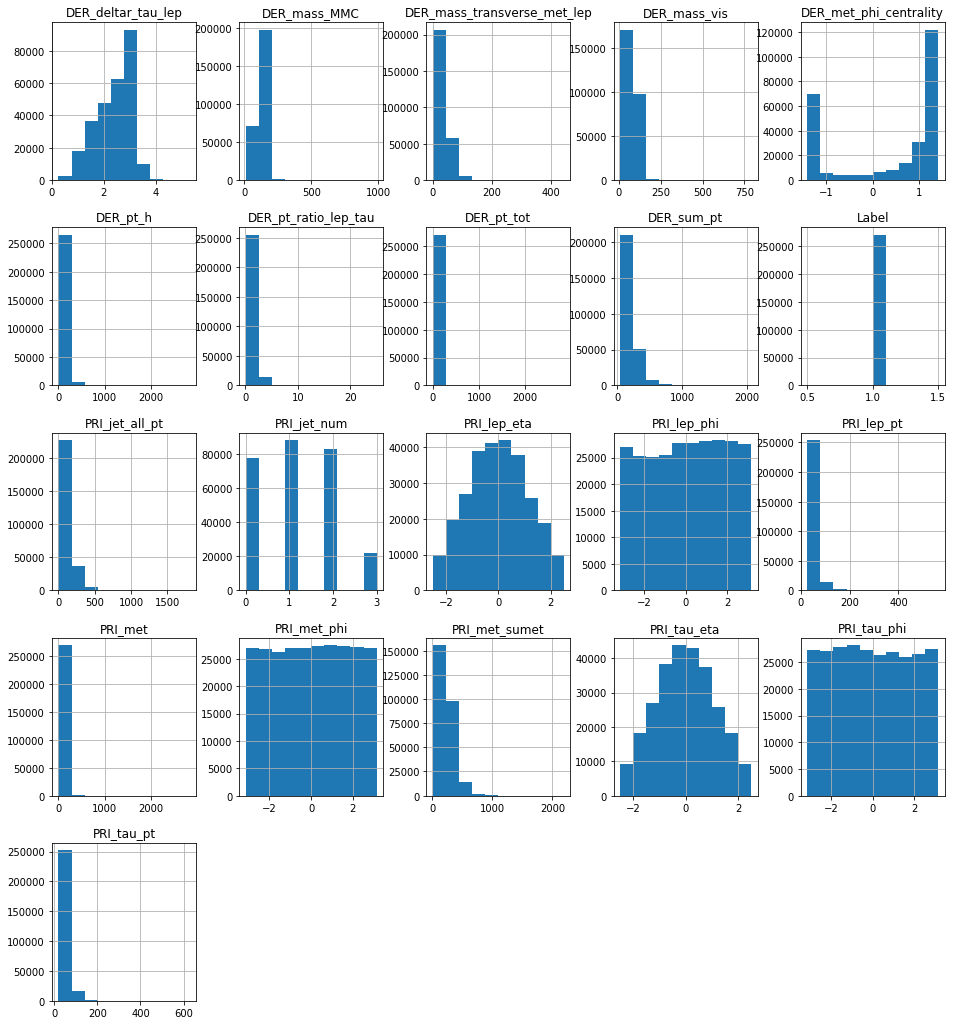

In [44]:
new_df[new_df["Label"] == 1].hist(figsize = (16,18))[1]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a20652cf8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a206bb358>], dtype=object)

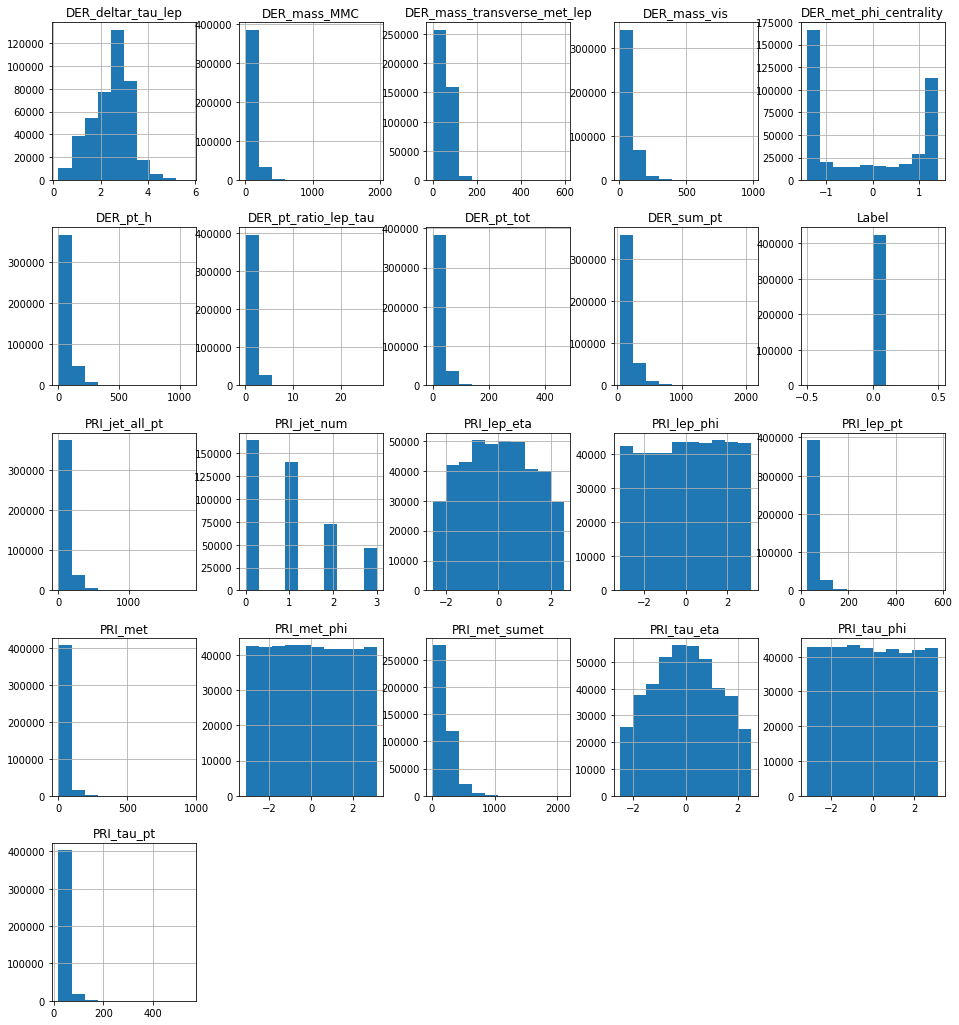

In [45]:
new_df[new_df["Label"] == 0].hist(figsize = (16,18))[1]